<a href="https://colab.research.google.com/github/SanePai/Neural_Networks-Assignment-1/blob/master/Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd "/content/drive/My Drive/NNFL"
!ls

/content/drive/My Drive/NNFL
assignment1.pdf  data4.xlsx		   training_feature_matrix.xlsx
data2.xlsx	 test_feature_matrix.xlsx  training_output.xlsx
data3.xlsx	 test_output.xlsx


In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

BATCH GRADIENT DESCENT


In [3]:
X1 = pd.read_excel("training_feature_matrix.xlsx", header=None)
Y1 = pd.read_excel("training_output.xlsx",header=None)
Y_mean = Y1.mean()
Y_std = Y1.std()
#Normalization
X1 = (X1 - X1.mean())/X1.std()
Y1 = (Y1-Y1.mean())/Y1.std()
X1 = np.array(X1)
Y1 = np.array(Y1)
m = len(X1) #Number of instances
col = np.ones((m,1)) 
X1 = np.concatenate((col,X1),axis=1)
X = X1.copy()
Y = Y1.copy()

In [4]:
k = 300 #Iterations
alpha = 0.0001 #Learning Rate
lam = 100
W_list = np.ones((k,3))
J_list = np.ones(k)
MSE_list = np.ones(k)


In [5]:
def hypothesis(w,X,m):
  '''Returns the hypothesis as a list for given weights'''
  h = []
  for i in range(0,m):
    h.append(w[0] + w[1]*X[i][1] + w[2]*X[i][2])
  return h

def update(w,alpha,m,X,Y,h,lam):
  '''Updates the weights'''
  d0 = 0
  d1 = 0
  d2 = 0
  for i in range(0,m):
    d0 = d0 + ((h[i] - Y[i])*X[i][0])
  for i in range(0,m):
    d1 = d1 + ((h[i] - Y[i])*X[i][1])
  for i in range(0,m):
    d2 = d2 + ((h[i] - Y[i])*X[i][2])
  

  t0 = w[0]*(1 - alpha*lam) - alpha*d0
  t1 = w[1]*(1 - alpha*lam) - alpha*d1
  t2 = w[2]*(1 - alpha*lam) - alpha*d2
  
  w[0]=t0
  w[1]=t1
  w[2]=t2
  return w

def cost(h,y,m,w):
  #Calculate Cost
  j = 0
  for i in range(0,m):
    j = j + 0.5*((h[i]-y[i])**2) 
  return (j + 0.5*lam*(np.dot(w,w)))  

def denormalize(data,avg,vari):
  '''Denormalize a list using the passed in mean and variation'''
  data1 = []
  for i in range(0,len(data)):
    data1.append((data[i]*vari) + avg)
  return data1

def calc_mse(m, h, y):
  '''Calculate the MSE for a given hypothesis and actual output'''
  add = 0
  for i in range(0,m):
    add = add + (h[i] - y[i])**2
  err = add/m
  return err


Batch Gradient Descent

In [6]:
#Batch Gradient Descent
w = np.random.rand(3)
W_list[0] = w
for i in range(0,k):
  h = hypothesis(w,X,m)
  J_list[i] = cost(h,Y,m,w)
  w = update(w,alpha,m,X,Y,h,lam)
  W_list[i][0] = w[0]
  W_list[i][1] = w[1]
  W_list[i][2] = w[2]
  MSE_list[i] = (calc_mse(m,denormalize(h,Y_mean,Y_std),denormalize(Y,Y_mean,Y_std)))

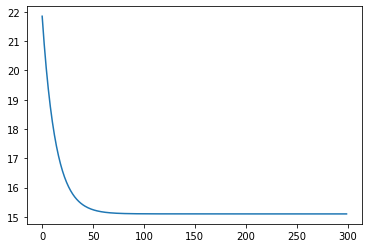

In [7]:
plt.plot(range(k), MSE_list)

In [8]:
print(MSE_list[-1]) #Training Error
print(J_list[-1])

15.09774964533668
115.32284208465352


Text(0, 0.5, 'Cost')

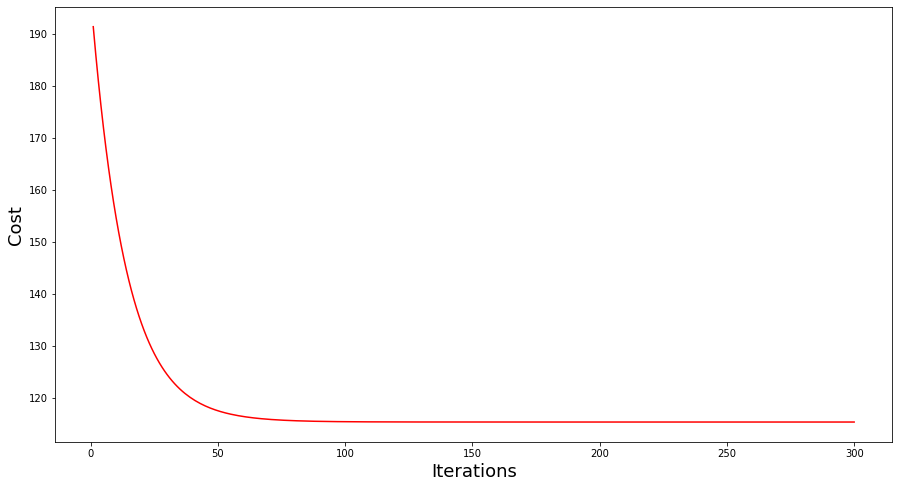

In [9]:
#Cost vs Iterations graph
plt.figure(figsize=(15,8))
g = plt.axes()
g.plot(range(1,k+1), J_list, 'red')
g.set_xlabel("Iterations", fontsize = 18)
g.set_ylabel("Cost", fontsize = 18)

Text(0.5, 0.92, 'Cost vs weights')

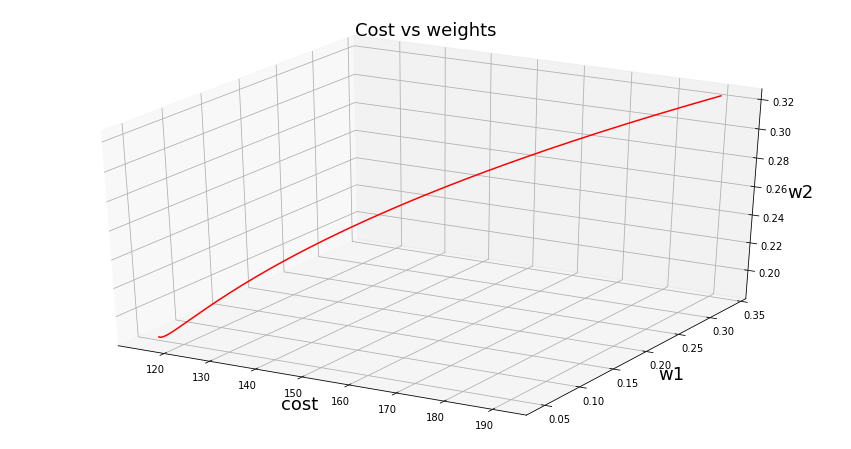

In [10]:
#Cost vs Weights(w1,w2)
plt.figure(figsize=(15,8))
gr = plt.axes(projection='3d')
gr.plot3D(J_list, W_list[:,1], W_list[:,2], 'red')
gr.set_xlabel("cost", fontsize = 18)
gr.set_ylabel("w1", fontsize = 18)
gr.set_zlabel("w2", fontsize = 18)
gr.set_title("Cost vs weights", fontsize = 18)

In [11]:
#Using the hypothesis on the given test data
X1_test = pd.read_excel("test_feature_matrix.xlsx", header = None)
Y1_test = pd.read_excel("test_output.xlsx", header = None)
#Normalize
X1_test = (X1_test-X1_test.mean())/X1_test.std()
X1_test = np.array(X1_test)
Y1_test = np.array(Y1_test)
m_test = len(X1_test)
av = Y1_test.mean()
va = Y1_test.std()
col = np.ones((m_test,1)) 
X1_test = np.concatenate((col,X1_test),axis=1)
X_test = X1_test.copy()
Y_test = Y1_test.copy()
h_test = hypothesis(w,X_test,m_test)
mse = calc_mse(m_test,denormalize(h_test,av,va),Y_test)
print("MSE(Test data): ", mse)
print("Final Weights:", w)

MSE(Test data):  [2.6330823]
Final Weights: [1.48433954e-05 4.51304725e-02 1.83288221e-01]


MINI BATCH GRADIENT DESCENT

Mini Batch

In [12]:
%cd "/content/drive/My Drive/NNFL"
!ls
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

/content/drive/My Drive/NNFL
assignment1.pdf  data4.xlsx		   training_feature_matrix.xlsx
data2.xlsx	 test_feature_matrix.xlsx  training_output.xlsx
data3.xlsx	 test_output.xlsx


In [13]:
X1 = pd.read_excel("training_feature_matrix.xlsx", header=None)
Y1 = pd.read_excel("training_output.xlsx",header=None)
Y_mean = Y1.mean()
Y_std = Y1.std()
#Normalization
X1 = (X1 - X1.mean())/X1.std()
Y1 = (Y1-Y1.mean())/Y1.std()
X1 = np.array(X1)
Y1 = np.array(Y1)
m = len(X1) #Number of instances
col = np.ones((m,1)) 
X1 = np.concatenate((col,X1),axis=1)

In [14]:
X = X1.copy()
Y = Y1.copy()
k = 1000 #Iterations
lam = 100
alpha = 0.0001 #Learning Rate
W_list = np.ones((k,3))
J_list = np.ones(k)
MSE_list = np.ones(k)

In [15]:
def hypothesis(w,X,m):
  '''Returns the hypothesis as a list for given weights'''
  h = []
  for i in range(0,m):
    h.append(w[0] + w[1]*X[i][1] + w[2]*X[i][2])
  return h

def update(w,alpha,m,X,Y,h,lam):
  '''Updates the weights'''
  d0 = 0
  d1 = 0
  d2 = 0
  for i in range(0,m):
    d0 = d0 + ((h[i] - Y[i])*X[i][0])
  for i in range(0,m):
    d1 = d1 + ((h[i] - Y[i])*X[i][1])
  for i in range(0,m):
    d2 = d2 + ((h[i] - Y[i])*X[i][2])
  

  t0 = w[0]*(1 - alpha*lam) - alpha*d0
  t1 = w[1]*(1 - alpha*lam) - alpha*d1
  t2 = w[2]*(1 - alpha*lam) - alpha*d2
  
  w[0]=t0
  w[1]=t1
  w[2]=t2
  return w

def cost(h,y,m,w):
  #Calculate Cost
  j = 0
  for i in range(0,m):
    j = j + 0.5*((h[i]-y[i])**2) 
  return j  + lam*(np.dot(w,w))

def denormalize(data,avg,vari):
  '''Denormalize a list using the passed in mean and variation'''
  data1 = []
  for i in range(0,len(data)):
    data1.append((data[i]*vari) + avg)
  return data1

def calc_mse(m, h, y):
  '''Calculate the MSE for a given hypothesis and actual output'''
  add = 0
  for i in range(0,m):
    add = add + (h[i] - y[i])**2
  err = add/m
  return err

In [16]:
m_star = 20 #Batch size(m*)
w = np.random.rand(3)
for i in range(0,k):
  np.random.shuffle(X)
  h = hypothesis(w,X,m)
  w = update(w, alpha, m_star, X, Y,h, lam)
  W_list[i][0] = w[0]
  W_list[i][1] = w[1]
  W_list[i][2] = w[2]
  MSE_list[i] = (calc_mse(m_star,denormalize(h,Y_mean,Y_std),denormalize(Y,Y_mean,Y_std)))
  J_list[i] = cost(h,Y,m,w)

Text(0, 0.5, 'Cost')

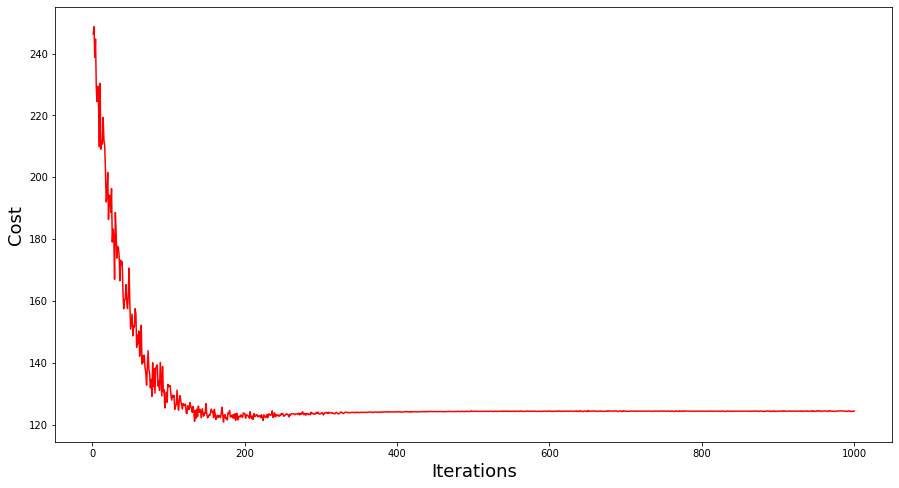

In [17]:
#Cost vs Iterations graph
plt.figure(figsize=(15,8))
g = plt.axes()
g.plot(range(1,k+1), J_list, 'red')
g.set_xlabel("Iterations", fontsize = 18)
g.set_ylabel("Cost", fontsize = 18)

Text(0.5, 0.92, 'Cost vs weights')

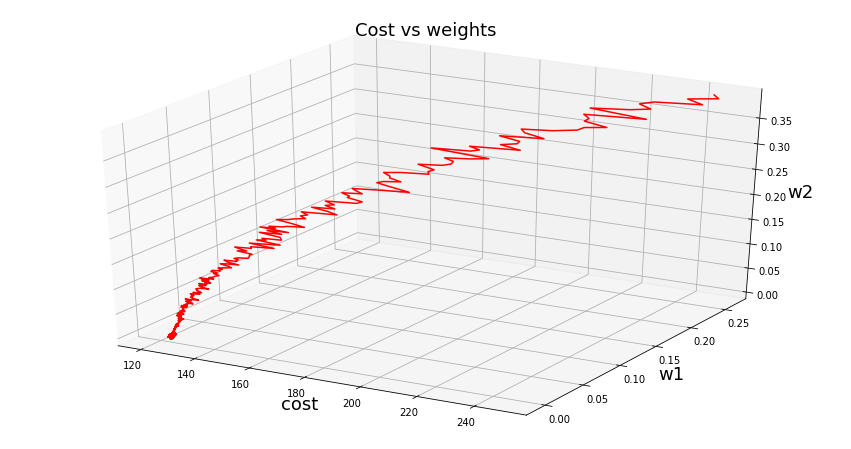

In [18]:
#Cost vs Weights(w1,w2)
plt.figure(figsize=(15,8))
gr = plt.axes(projection='3d')
gr.plot3D(J_list, W_list[:,1], W_list[:,2], 'red')
gr.set_xlabel("cost", fontsize = 18)
gr.set_ylabel("w1", fontsize = 18)
gr.set_zlabel("w2", fontsize = 18)
gr.set_title("Cost vs weights", fontsize = 18)

In [19]:
print(J_list[-1])

124.41455219363712


In [20]:
print(MSE_list[-1])

10.07301500477516


In [21]:
#Using the hypothesis on the given test data
X1_test = pd.read_excel("test_feature_matrix.xlsx", header = None)
Y1_test = pd.read_excel("test_output.xlsx", header = None)
#Normalize
X1_test = (X1_test-X1_test.mean())/X1_test.std()
X1_test = np.array(X1_test)
Y1_test = np.array(Y1_test)
m_test = len(X1_test)
av = Y1_test.mean()
va = Y1_test.std()
col = np.ones((m_test,1)) 
X1_test = np.concatenate((col,X1_test),axis=1)
X_test = X1_test.copy()
Y_test = Y1_test.copy()
h_test = hypothesis(w,X_test,m_test)
mse = calc_mse(m_test,denormalize(h_test,av,va),Y_test)
print("MSE(Test data): ", mse)
print("Final Weights:", w)

MSE(Test data):  [2.73350111]
Final Weights: [-0.10230897 -0.00282498 -0.00344481]


STOCHASTIC GRADIENT DESCENT

**STOCHASTIC**

In [22]:
X1 = pd.read_excel("training_feature_matrix.xlsx", header=None)
Y1 = pd.read_excel("training_output.xlsx",header=None)
Y_mean = Y1.mean()
Y_std = Y1.std()
#Normalization
X1 = (X1 - X1.mean())/X1.std()
Y1 = (Y1-Y1.mean())/Y1.std()
X1 = np.array(X1)
Y1 = np.array(Y1)
m = len(X1) #Number of instances
col = np.ones((m,1)) 
X1 = np.concatenate((col,X1),axis=1)

In [23]:
X = X1.copy()
Y = Y1.copy()
k = 1000 #Iterations
alpha = 0.0001 #Learning Rate
lam = 100
W_list = np.ones((k,3))
J_list = np.ones(k)
MSE_list = np.ones(k)

In [24]:
def hypothesis(w,X,m):
  '''Returns the hypothesis as a list for given weights'''
  h = []
  for i in range(0,m):
    h.append(w[0] + w[1]*X[i][1] + w[2]*X[i][2])
  return h

def update(w,alpha,m,X,Y,h,i,lam):
  '''Updates the weights'''
  for n in range(0,3):
    w[n] = w[n]*(1 - alpha*lam) - alpha*((h[i]-Y[i])*X[i][n])
  return w

def cost(h,y,m,w):
  #Calculate Cost
  j = 0
  for i in range(0,m):
    j = j + 0.5*((h[i]-y[i])**2)
  return j + lam*(np.dot(w,w))  

def denormalize(data,avg,vari):
  data1 = []
  for i in range(0,len(data)):
    data1.append((data[i]*vari) + avg)
  return data1

def calc_mse(m, h, y):
  add = 0
  for i in range(0,m):
    add = add + (h[i] - y[i])**2
  err = add/m  
  return err

In [25]:
w = np.random.rand(3)
print(w)
for i in range(k):
  index = np.random.randint(0,m)
  h = hypothesis(w,X,m)
  w = update(w,alpha,m,X,Y,h,index,lam)
  # print(w)
  W_list[i][0] = w[0]
  W_list[i][1] = w[1]
  W_list[i][2] = w[2]
  J_list[i] = cost(h,Y,m,w)
  # print(i, h[0], J_list[i])
  MSE_list[i] = (calc_mse(m,denormalize(h,Y_mean,Y_std),denormalize(Y,Y_mean,Y_std)))

print(J_list[-1])
print(w)

[0.60808663 0.28114869 0.78576282]
121.78995174226681
[0.00019208 0.00073853 0.00287085]


In [26]:
print(MSE_list[-1]) #Training Error

16.194470042997345


Text(0, 0.5, 'Cost')

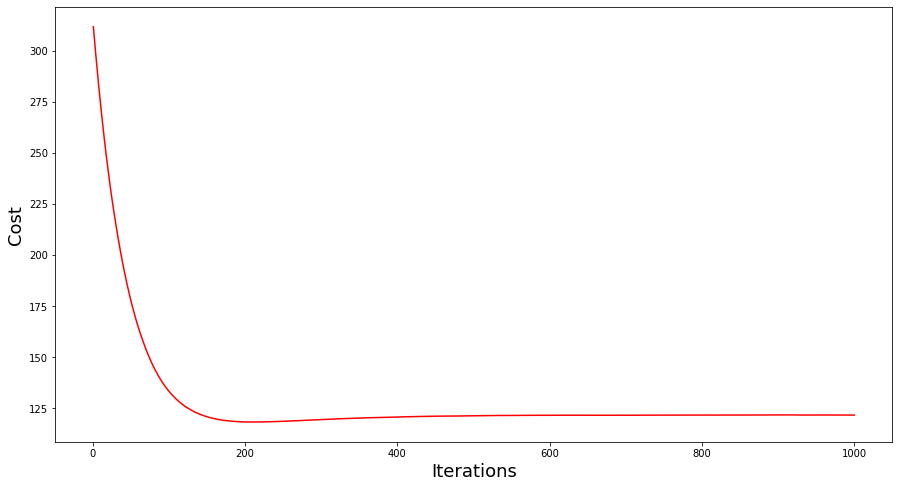

In [27]:
plt.figure(figsize=(15,8))
g = plt.axes()
g.plot(range(1,k+1), J_list, 'red')
g.set_xlabel("Iterations", fontsize = 18)
g.set_ylabel("Cost", fontsize = 18)

Text(0.5, 0.92, 'Cost vs weights')

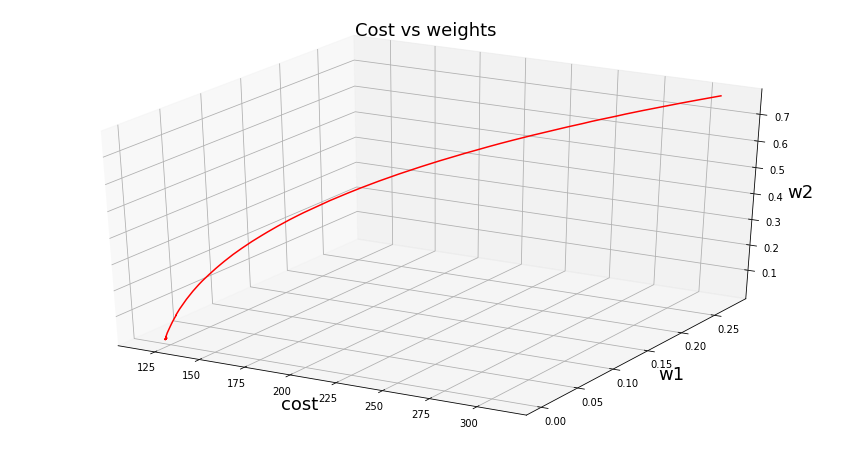

In [28]:
plt.figure(figsize=(15,8))
gr = plt.axes(projection='3d')
gr.plot3D(J_list, W_list[:,1], W_list[:,2], 'red')
gr.set_xlabel("cost", fontsize = 18)
gr.set_ylabel("w1", fontsize = 18)
gr.set_zlabel("w2", fontsize = 18)
gr.set_title("Cost vs weights", fontsize = 18)

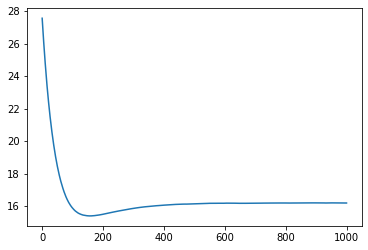

In [29]:
plt.plot(range(0,k),MSE_list)

In [30]:
#Using the hypothesis on the given test data
X1_test = pd.read_excel("test_feature_matrix.xlsx", header = None)
Y1_test = pd.read_excel("test_output.xlsx", header = None)
#Normalize
X1_test = (X1_test-X1_test.mean())/X1_test.std()
X1_test = np.array(X1_test)
Y1_test = np.array(Y1_test)
m_test = len(X1_test)
av = Y1_test.mean()
va = Y1_test.std()
col = np.ones((m_test,1)) 
X1_test = np.concatenate((col,X1_test),axis=1)
X_test = X1_test.copy()
Y_test = Y1_test.copy()
h_test = hypothesis(w,X_test,m_test)
mse = calc_mse(m_test,denormalize(h_test,av,va),Y_test)
print("MSE(Test data): ", mse)
print("Final Weights:", w)

MSE(Test data):  [2.69954711]
Final Weights: [0.00019208 0.00073853 0.00287085]
